# Web Crawling 2 - 셀레니움
일반적인 유저의 이용과 동일한 방식으로 작동하기에 원론적으로 막을 수 없는 방식의 크롤링을 지원하는 크롤링 도구.

(너무 강력하기에 최근에는 크롬에서 이용 시간을 제한한다.)

## 위키 문헌 정보 추출
-  위키 문헌(https://ko.wikisource.org/wiki/) 의 정보를 추출하는 연습을 해본다

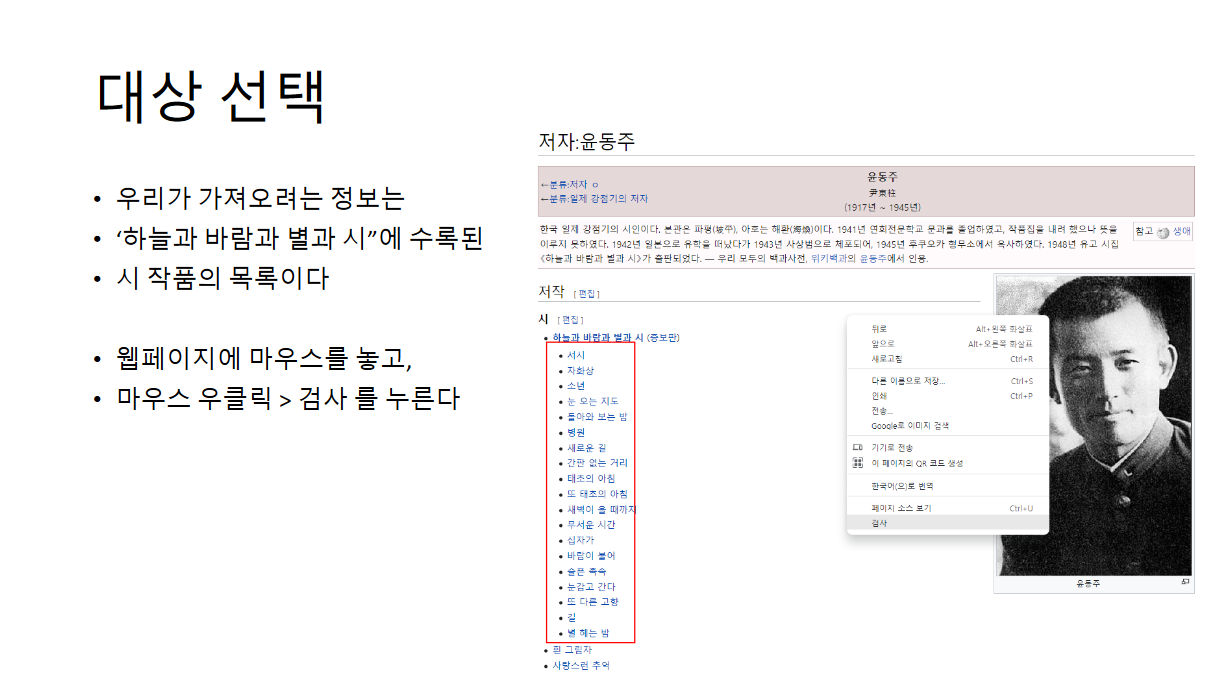

In [1]:
#mw-content-text > div.mw-content-ltr.mw-parser-output > ul:nth-child(6)

#mw-content-text > div.mw-content-ltr.mw-parser-output > ul:nth-child(6) > li


nth-child는 크롤링 도구들이 잘 지원하지 않는 편이다.(쉽게 바뀌기 때문에 관리도 어렵다.)

In [6]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC'
res = urllib.request.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')

a_list = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > ul > li > ul')

for a in a_list:
    print(a.text)

서시
자화상
소년
눈 오는 지도
돌아와 보는 밤
병원
새로운 길
간판 없는 거리
태초의 아침
또 태초의 아침
새벽이 올 때까지
무서운 시간
십자가
바람이 불어
슬픈 족속
눈감고 간다
또 다른 고향
길
별 헤는 밤


1. 요소선택으로 DOM 구조 파악
2. DOM 구조의 고유성이 유지되는 수준으로 간략화(작은 구조 변경에 대한 강건성)


## Daum Weather

In [77]:
import requests
from bs4 import BeautifulSoup

location = '제주도 서귀포시'
search_query = location+' 날씨'
search_url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q='

url = search_url + search_query

res = requests.get(url)

In [78]:
soup = BeautifulSoup(res.text, 'html.parser')
# print(soup)

In [79]:
weather = soup.select('#weatherColl > div > div > div > div > div > div.cont_weather > div > div')

for w in weather:
    print('\n'.join(w.text.split('  ')))



 11시 현재, 흐림 24℃

어제와 같아요.  체감온도 27℃ 

현재풍속 3.2m/s
 현재습도 88%

미세먼지 좋음 (29㎍/㎥)
 


In [80]:
temp = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.cont_weather > div > div.info_temp > div > span > span > strong')[0]
temp.text

'24℃'

In [81]:
rain = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_rain > dl > dd')[0]
rain.text

'0mm'

In [88]:
wind_dir = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_wind > ul > li.on > span.ico_wind.wind7')[-1]
wind_dir.text

'남서풍'

In [89]:
wind = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_wind > ul > li.on > span.txt_num')[-1]
wind.text

'3m/s'

In [83]:
hum = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.cont_weather > div > div.info_another > dl> dd')[-1]
hum.text

'88%'

In [90]:
print(f'''
--------- [오늘의 날씨] --------
- 지역 : {location} 
- 온도 : {temp.text}
- 풍향 : {wind_dir.text}
- 풍속 : {wind.text}
- 습도 : {hum.text}
- 강수량 : {rain.text}    
      '''
      )


--------- [오늘의 날씨] --------
- 지역 : 제주도 서귀포시 
- 온도 : 24℃
- 풍향 : 남서풍
- 풍속 : 3m/s
- 습도 : 88%
- 강수량 : 0mm    
      


In [104]:
# 차윤
import requests
from bs4 import BeautifulSoup
# loca = input("지역을 입력하세요:")
loca = "광주 동구"
serch_query = loca + ' 날씨'
serch_url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q='
url = serch_url + serch_query

res = requests.get(url)
soup = BeautifulSoup(res.text)
print('====== [오늘의 날씨] ======\n지역:', loca)
temp = soup.select('#weatherColl > div > div > div > div > div > div > div > div > div > span > span > strong')
print('온도:',temp[0].text)
whr = soup.select('#weatherColl > div > div > div > div > div > div > div > div > dl > dd')
print('풍속:',whr[0].text)
print('습도:',whr[1].text)
print('강수량:',whr[2].text)


====== [오늘의 날씨] ======
지역: 광주 동구
온도: 24℃
풍속: 2.3m/s
습도: 97%
강수량: 0mm


In [108]:
#김태균
import requests
from bs4 import BeautifulSoup

search_url = 'https://search.daum.net/search?w=tot&DA=Z8T&q='
location = "광주 동구"
search_query = location + " 날씨"
url = search_url + search_query

temporature = soup.select_one('#weatherColl > div > div > div > div > div > div > div > div > div > span > span > strong').text
wind_speed = soup.select_one('#weatherColl > div > div > div > div > div > div > div > div > dl:nth-child(1) > dd').text
humidity = soup.select_one('#weatherColl > div > div > div > div > div > div > div > div > dl:nth-child(2) > dd').text
finedust = soup.select_one('#weatherColl > div > div > div > div > div > div > div > div > a > dl > dd').text
rainfall = soup.select_one('#weatherColl > div > div > div > div > div > div > div > div > ul > li > span:nth-child(4)').text

print("-------- [오늘의 날씨] --------")
print("- 지역: ", location)
print("- 온도: ", temporature)
print("- 풍속: ", wind_speed)
print("- 습도: ", humidity)
print("- 강수량: ", rainfall)
print("- 미세먼지: ", finedust)

-------- [오늘의 날씨] --------
- 지역:  광주 동구
- 온도:  24℃
- 풍속:  2.3m/s
- 습도:  97%
- 강수량:  0mm
- 미세먼지:  보통 (45㎍/㎥)


## 셀레니움을 이용한 웹 크롤링

- 셀레니움은 웹페이지에서 행위를 대신 수행해주는 프로그램
- 따라서 마우스와 키보드를 이용하지 않고 코드로 웹페이지를 제어할 수 있다
- 반복적인 작업이 가능하므로 대량의 텍스트를 모을 수 있다
- 그러나 오픈 되어 있더라도 사이트의 모든 텍스트를 빠른 시간 안에 수집하는 것은 웹사이트의 제작 의도와는 다르므로 ip 차단을 당할 수 있다
- 법적 책임을 피하려면 연구 목적에서 적절히 수집하는 것이 바람직하다
- 설치는 pip 명령어로 간단히 할 수 있다
- pip install selenium

강력함에 대한 규제
- 셀레니움을 사용하는 경우 이를 이용하고 있다는 상태 정보를 웹사이트로 전달
- 한 번에 사용할 수 있는 시간을 제한

### Chrome Driver
- 크롬 웹 브라우저를 동작하게 만드는 드라이버.
- 셀레니움은 크롬 드라이버를 활용한다. -- 버전 호환 확인 필요
- 크롬 드라이버에서 셀레니움을 막는다면 셀레니움을 사용할 수 없다.

-  자동화된 웹 크롤링은 편리하지만, 서버 쪽에서는 많은 부담이 된다
- 이에 많은 사이트들은 이를 사용하지 못하게 다양한 회피 방법을 갖는다
    - 자바 스크립트 활용, iframe 활용 등
        - 하지만 셀레니움으로 우회할 수 있다.
- 여기서는 크롬 드라이버 운영에 대한 이해를 목적으로 간단한 검색에 초점을 둔다

(주의)
- 가급적 Jupyter Notebook에서 진행한다
- 파이참의 경우에는 크롬 드라이버를 환경변수 Path 에 설정해야 한다
- Visual Studio Code 에서는 Jupyter Notebook 환경에서 진행한다

다음 경로에서 자신의 크롬 버전에 맞는 크롬 드라이버를 다운로드한다
- https://sites.google.com/chromium.org/driver/

현재는 Chrome Driver가 더이상 새로운 버전을 별도로 공개하지 않는 상태이다. (크롬웹 125 버전까지는 호환된다.)

#### Daum Weather

In [109]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

path = 'D:\\elice_python\\GAS_5\\pytest\\'

In [110]:
location = input('어떤 지역의 날씨를 알려드릴까요? \n: ')
search_query = location +' 날씨'

In [119]:
# driver_path = "C:\\TEMP\\chromedriver_win32_114\\chromedriver.exe"
# driver = webdriver.Chrome(driver_path) #driver_path를 명시하지 않아도 알아서 찾기도 한다.


In [123]:
# 필요한 패키지 설치
# pip install webdriver-manager

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriver를 설치하고 경로를 변수에 저장
driver_path = ChromeDriverManager().install()

# 저장된 경로를 사용하여 ChromeDriver 실행
driver = webdriver.Chrome(driver_path)

# driver_path를 재사용할 수 있음
print("ChromeDriver 경로:", driver_path)


C:\Users\Caelu\.wdm\drivers\chromedriver\win64\125.0.6422.141\chromedriver-win32/chromedriver.exe
ChromeDriver 경로: C:\Users\Caelu\.wdm\drivers\chromedriver\win64\125.0.6422.141\chromedriver-win32/chromedriver.exe


In [117]:
url = 'https://www.daum.net/' # 검색 대상 주소
driver.get(url)
time.sleep(2) # 2초간 대기

- 검색 창에 우클릭 → 검사 click
- 검색 창의 id와 그 value를 확인한다

In [118]:
# 3. 검색창 element 확보
element = driver.find_element('id','q')
element.send_keys(search_query) # 검색창에 검색어 전송

# 4. 엔터 키를 전송해 검색 실행
element.send_keys('\n')

In [120]:
time.sleep(1)
full_html = driver.page_source
driver.quit()  # 웹 브라우저 명시적 종료

In [121]:
soup = BeautifulSoup(full_html, 'html.parser')
temperature_list = soup.select("#weatherColl > div > div > div > div > div > div > div > div > div > span > span > strong")

for temp in temperature_list:
    print(temp.text)

27℃


### Selenium 활용 예시

In [126]:
from bs4 import BeautifulSoup
import time

from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

path = 'D:\\elice_python\\GAS_5\\pytest\\'
driver = webdriver.Chrome(driver_path')

url = 'https://www.daum.net/' # 검색 대상 주소
driver.get(url)
time.sleep(2) # 2초간 대기

# 3. 검색창 element 확보
element = driver.find_element('id','q')
element.send_keys(search_query) # 검색창에 검색어 전송

# 4. 엔터 키를 전송해 검색 실행
element.send_keys('\n')

time.sleep(1)
full_html = driver.page_source
driver.quit()  # 웹 브라우저 명시적 종료

soup = BeautifulSoup(full_html, 'html.parser')

In [127]:
weather = soup.select('#weatherColl > div > div > div > div > div > div.cont_weather > div > div')

for w in weather:
    print('\n'.join(w.text.split('  ')))



 14시 현재, 구름조금 27℃

어제보다 2°C 낮아요.  체감온도 27℃ 

현재풍속 4.2m/s
 현재습도 55%

미세먼지 보통 (36㎍/㎥)
 


In [128]:
temp = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.cont_weather > div > div.info_temp > div > span > span > strong')[0]
temp.text

'27℃'

In [129]:
rain = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_rain > dl > dd')[0]
rain.text

'0.1mm'

In [130]:
wind_dir = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_wind > ul > li.on > span.ico_wind.wind7')[-1]
wind_dir.text

'남서풍'

In [131]:
wind = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.area_divider > div.wrap_panel > div.area_wind > ul > li.on > span.txt_num')[-1]
wind.text

'4m/s'

In [132]:
hum = soup.select('#weatherColl > div.coll_cont > div > div.wrap_region.today > div.wrap_cont > div > div.cont_weather > div > div.info_another > dl> dd')[-1]
hum.text

'55%'

In [133]:
print(f'''
--------- [오늘의 날씨] --------
- 지역 : {location} 
- 온도 : {temp.text}
- 풍향 : {wind_dir.text}
- 풍속 : {wind.text}
- 습도 : {hum.text}
- 강수량 : {rain.text}    
      '''
      )


--------- [오늘의 날씨] --------
- 지역 : 경기도 부천시 
- 온도 : 27℃
- 풍향 : 남서풍
- 풍속 : 4m/s
- 습도 : 55%
- 강수량 : 0.1mm    
      
